In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('pension_data.csv', encoding='ISO-8859-1')
# Preview the dataset
print(df.head())
# Show basic info
print(df.info())

   ppd_id     PlanName      fy  system_id  \
0       1  Alabama ERS  2001.0        1.0   
1       1  Alabama ERS  2002.0        1.0   
2       1  Alabama ERS  2003.0        1.0   
3       1  Alabama ERS  2004.0        1.0   
4       1  Alabama ERS  2005.0        1.0   

                              PlanFullName source_PlanBasics  FiscalYearType  \
0  Employees Retirement System of Alabama               NaN             0.0   
1  Employees Retirement System of Alabama               NaN             0.0   
2  Employees Retirement System of Alabama               NaN             0.0   
3  Employees Retirement System of Alabama               NaN             0.0   
4  Employees Retirement System of Alabama               NaN             0.0   

   PlanInceptionYear  PlanClosed  PlanYearClosed  ...  CashTotal_Rtrn  \
0             1945.0         0.0             NaN  ...             NaN   
1             1945.0         0.0             NaN  ...             NaN   
2             1945.0         

In [4]:
#Data Cleaning

# Fill missing funded ratio values with the column mean
df['Funded_Ratio'] = df['ActFundedRatio_GASB'].fillna(df['ActFundedRatio_GASB'].mean())

# Fill missing employer contributions with 0
df['Employer_Contribution'] = df['contrib_ER_regular'].fillna(0)

# Fill missing employee contributions with 0
df['Employee_Contribution'] = df['contrib_EE_regular'].fillna(0)

# Fill missing asset values with the column median
df['Assets'] = df['ActAssets_GASB'].fillna(df['ActAssets_GASB'].median())

# Fill missing liability values with the column median
df['Liabilities'] = df['ActLiabilities_GASB'].fillna(df['ActLiabilities_GASB'].median())

# Convert fiscal year to numeric, invalid entries become NaN
df['Year'] = pd.to_numeric(df['fy'], errors='coerce')

# Drop rows where Year is missing
df = df.dropna(subset=['Year'])

# Convert Year to integer type
df['Year'] = df['Year'].astype(int)

# Create total contribution as the sum of employer and employee contributions
df['Total_Contribution'] = df['Employer_Contribution'] + df['Employee_Contribution']

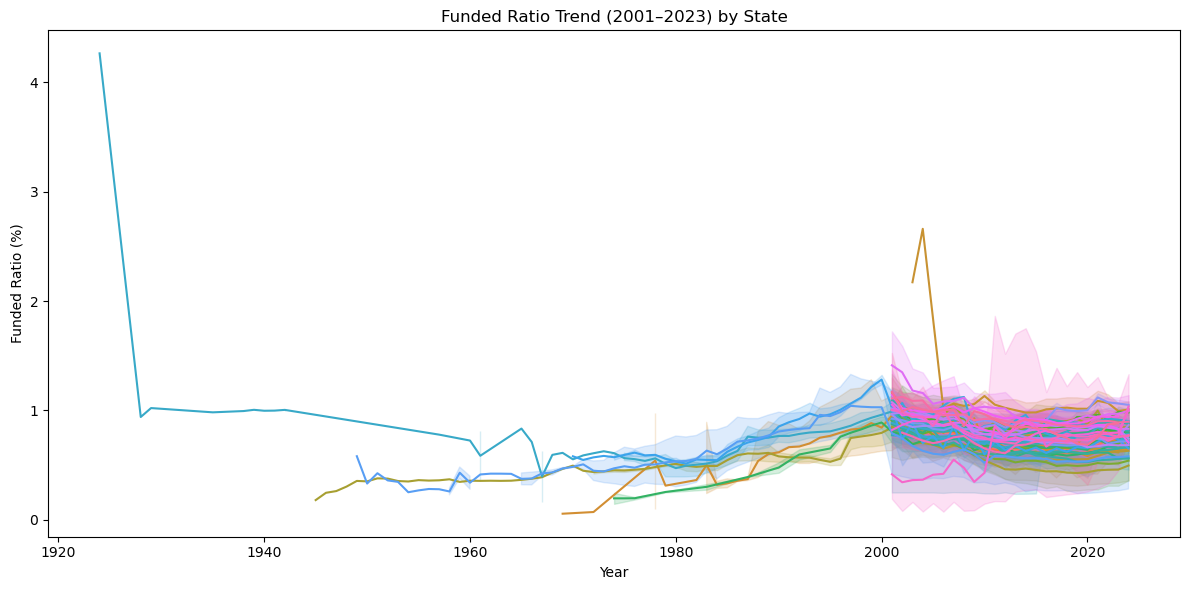

In [5]:
#Exploratory Data Analysis (EDA)
#Funded Ratio Trend
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(12,6))

# Create a line plot showing funded ratio trends by state
sns.lineplot(data=df, x='Year', y='ActFundedRatio_GASB', hue='StateName', legend=False)

# Add a title to the plot
plt.title('Funded Ratio Trend (2001–2023) by State')

plt.ylabel('Funded Ratio (%)')
plt.xlabel('Year')

# Adjust layout to prevent overlapping text
plt.tight_layout()

# Display the plot
plt.show()

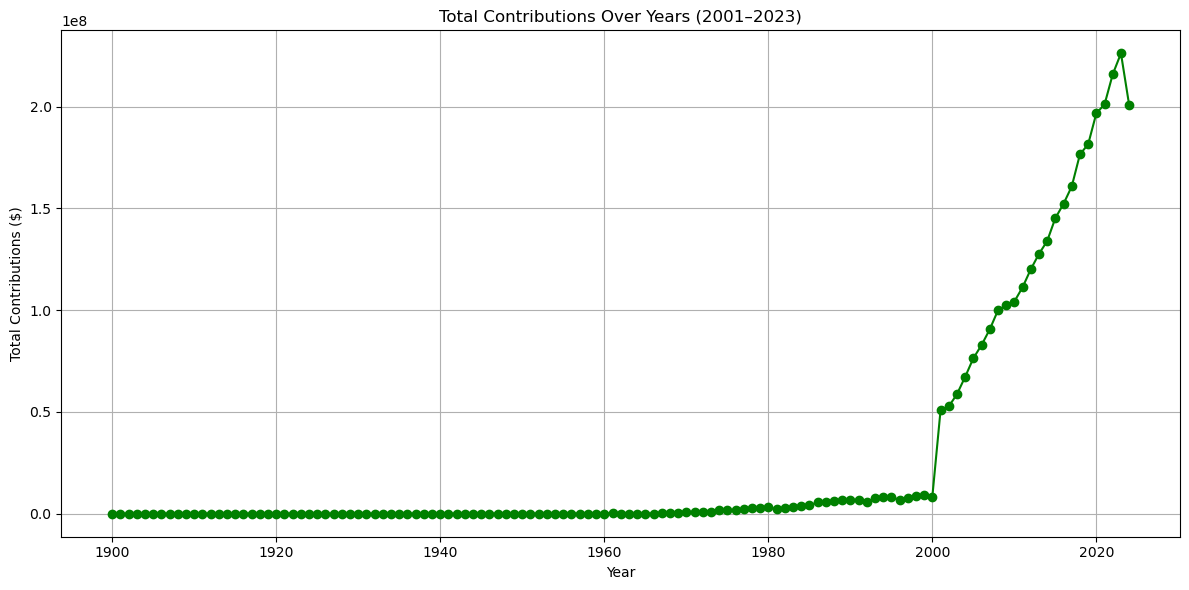

In [7]:
# Total Contributions Over Time

# Group total contributions by year and sum them
contrib_trends = df.groupby('Year')['Total_Contribution'].sum()

# Set figure size for better visibility
plt.figure(figsize=(12,6))

# Plot the total contributions as a line chart
contrib_trends.plot(kind='line', marker='o', color='green')

# Add a title to the plot
plt.title('Total Contributions Over Years (2001–2023)')

# Label the axis
plt.ylabel('Total Contributions ($)')
plt.xlabel('Year')

# Add gridlines for readability
plt.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

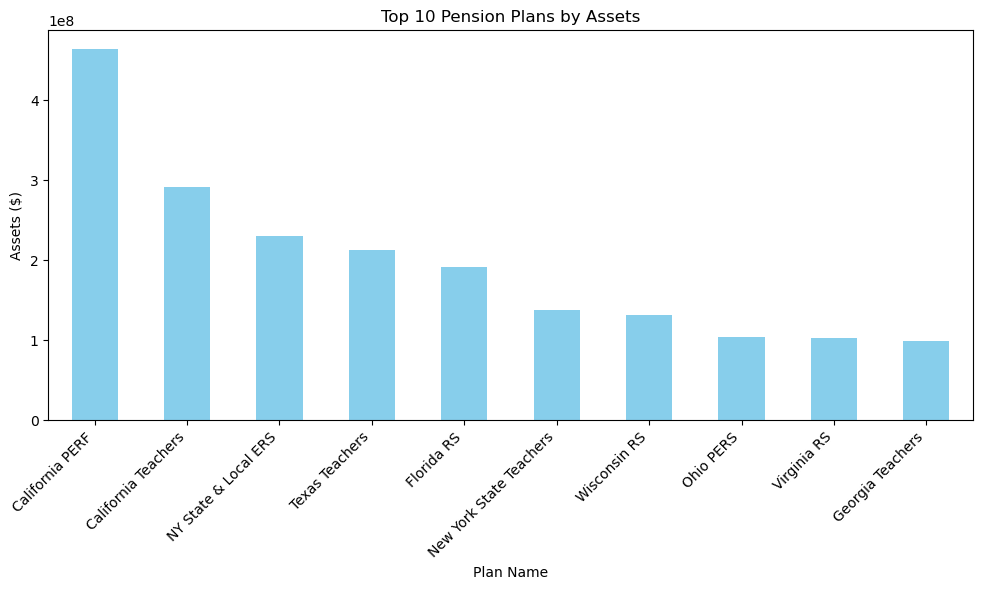

In [8]:
# Top 10 Plans by Assets

# Fill missing asset values with the median to ensure accuracy
df['Assets'] = df['ActAssets_GASB'].fillna(df['ActAssets_GASB'].median())

# Group by plan name and find the maximum assets for each plan, then get the top 10
top_assets = df.groupby('PlanName')['Assets'].max().sort_values(ascending=False).head(10)

# Set figure size for clarity
plt.figure(figsize=(10,6))

# Plot top 10 plans by assets as a bar chart
top_assets.plot(kind='bar', color='skyblue')

# Add title to the chart
plt.title('Top 10 Pension Plans by Assets')

# Label y-axis
plt.ylabel('Assets ($)')

# Label x-axis
plt.xlabel('Plan Name')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

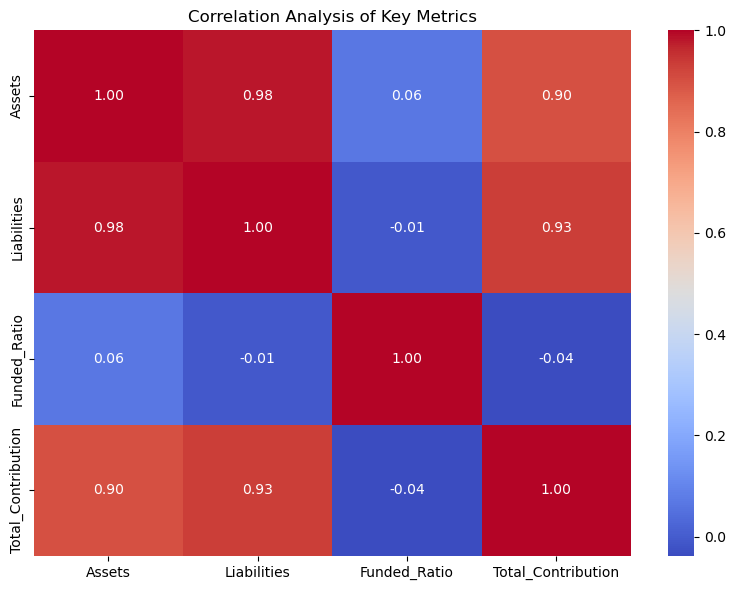

In [9]:
# Correlation Analysis

# Fill missing employer contributions with 0
df['Employer_Contribution'] = df['contrib_ER_regular'].fillna(0)

# Fill missing employee contributions with 0
df['Employee_Contribution'] = df['contrib_EE_regular'].fillna(0)

# Calculate total contributions as the sum of employer and employee contributions
df['Total_Contribution'] = df['Employer_Contribution'] + df['Employee_Contribution']

# Fill missing asset values with the median
df['Assets'] = df['ActAssets_GASB'].fillna(df['ActAssets_GASB'].median())

# Fill missing liability values with the median
df['Liabilities'] = df['ActLiabilities_GASB'].fillna(df['ActLiabilities_GASB'].median())

# Fill missing funded ratio values with the mean
df['Funded_Ratio'] = df['ActFundedRatio_GASB'].fillna(df['ActFundedRatio_GASB'].mean())

# Compute correlation matrix among key financial metrics
correlation = df[['Assets', 'Liabilities', 'Funded_Ratio', 'Total_Contribution']].corr()

# Set figure size for better readability
plt.figure(figsize=(8,6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title('Correlation Analysis of Key Metrics')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
# Predictive Modeling

# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fill missing employer contributions with 0
df['Employer_Contribution'] = df['contrib_ER_regular'].fillna(0)

# Fill missing employee contributions with 0
df['Employee_Contribution'] = df['contrib_EE_regular'].fillna(0)

# Calculate total contributions as the sum of employer and employee contributions
df['Total_Contribution'] = df['Employer_Contribution'] + df['Employee_Contribution']

# Fill missing asset values with the median
df['Assets'] = df['ActAssets_GASB'].fillna(df['ActAssets_GASB'].median())

# Fill missing liability values with the median
df['Liabilities'] = df['ActLiabilities_GASB'].fillna(df['ActLiabilities_GASB'].median())

# Fill missing funded ratio values with the mean
df['Funded_Ratio'] = df['ActFundedRatio_GASB'].fillna(df['ActFundedRatio_GASB'].mean())

# Define feature variables (inputs)
X = df[['Assets', 'Liabilities', 'Total_Contribution']]

# Define target variable (output)
y = df['Funded_Ratio']

# Drop any rows with missing values in features
X = X.dropna()

# Align target variable with feature indices
y = y.loc[X.index]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)

# Display the MSE value
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.03


In [11]:
# Find latest year
latest_year = df['Year'].max()

# Filter that year
df_latest = df[df['Year'] == latest_year]

# Top and bottom 5 states
top_states = df_latest.nlargest(5, 'ActFundedRatio_GASB')[['StateName', 'ActFundedRatio_GASB']]
bottom_states = df_latest.nsmallest(5, 'ActFundedRatio_GASB')[['StateName', 'ActFundedRatio_GASB']]

print(f"Top 5 States in {latest_year}:")
print(top_states)

print(f"\nBottom 5 States in {latest_year}:")
print(bottom_states)


Top 5 States in 2024:
                 StateName  ActFundedRatio_GASB
7204            Washington              1.49098
6844         West Virginia              1.33126
4606              Michigan              1.27262
7108              Virginia              1.10998
277   District of Columbia              1.08288

Bottom 5 States in 2024:
         StateName  ActFundedRatio_GASB
3803      Illinois              0.22798
3587  Rhode Island              0.28018
702       Kentucky              0.28232
3875      Illinois              0.42070
5548    New Jersey              0.45777


In [14]:
# Find the overall average funded ratio
avg_ratio = df['ActFundedRatio_GASB'].mean()
print("Average funded ratio of all states:", round(avg_ratio, 2), "%")

#If the average is close to 100%, states can easily pay future pensions.
#If it’s below 80%, many states might face problems.

Average funded ratio of all states: 0.78 %


In [ ]:
first_year = df['Year'].min()
last_year = df['Year'].max()

avg_start = df[df['Year'] == first_year]['ActFundedRatio_GASB'].mean()
avg_end = df[df['Year'] == last_year]['ActFundedRatio_GASB'].mean()

print(f"Average in {first_year}: {round(avg_start, 2)}%")
print(f"Average in {last_year}: {round(avg_end, 2)}%")

if avg_end > avg_start:
    print("✅ Pensions have improved overall!")
else:
    print("⚠️ Pensions have declined overall.")
